In [2]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ecdata = sc.read_10x_h5("data/emptydrops_all_detected_cells_cellbender.h5")
fcdata = sc.read_10x_h5("data/filtered_feature_bc_matrix_cellbender.h5")

edata = sc.read_h5ad("../data/emptydrops_all_detected_cells.h5ad")
fdata = sc.read_10x_h5("../data/filtered_feature_bc_matrix.h5")

/Users/oskarhaupt/Library/Python/3.9/lib/python/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound
/Users/oskarhaupt/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/oskarhaupt/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/oskarhaupt/Library/Python/3.9/lib/python/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them uni

In [3]:
ecdata

AnnData object with n_obs × n_vars = 12315 × 22040
    var: 'gene_ids', 'feature_types', 'genome'

In [ ]:
edata

AnnData object with n_obs × n_vars = 12315 × 22040
    obs: 'emptydrops_detected', 'fdr_threshold', 'total_umi'
    var: 'gene_ids', 'feature_types', 'genome', 'interval'
    uns: 'filtering_info'

=== data comparison overview ===
EmptyDrops data (edata): 12315 cells × 22040 genes
EmptyDrops + CellBender (ecdata): 12315 cells × 22040 genes
Filtered data (fdata): 2701 cells × 22040 genes
Filtered + CellBender (fcdata): 2701 cells × 22040 genes
-> there where no cells filtered out by CellBender at all

=== UMI Count Statistics ===
EmptyDrops - Mean UMI: 2489.8
EmptyDrops+CB - Mean UMI: 1078.3
Filtered - Mean UMI: 4286.0
Filtered+CB - Mean UMI: 1341.7

=== Total UMI Reduction by CellBender ===
EmptyDrops: 30,661,928 → 13,279,407 UMIs (56.7% reduction)
Filtered: 11,576,431 → 3,624,030 UMIs (68.7% reduction)


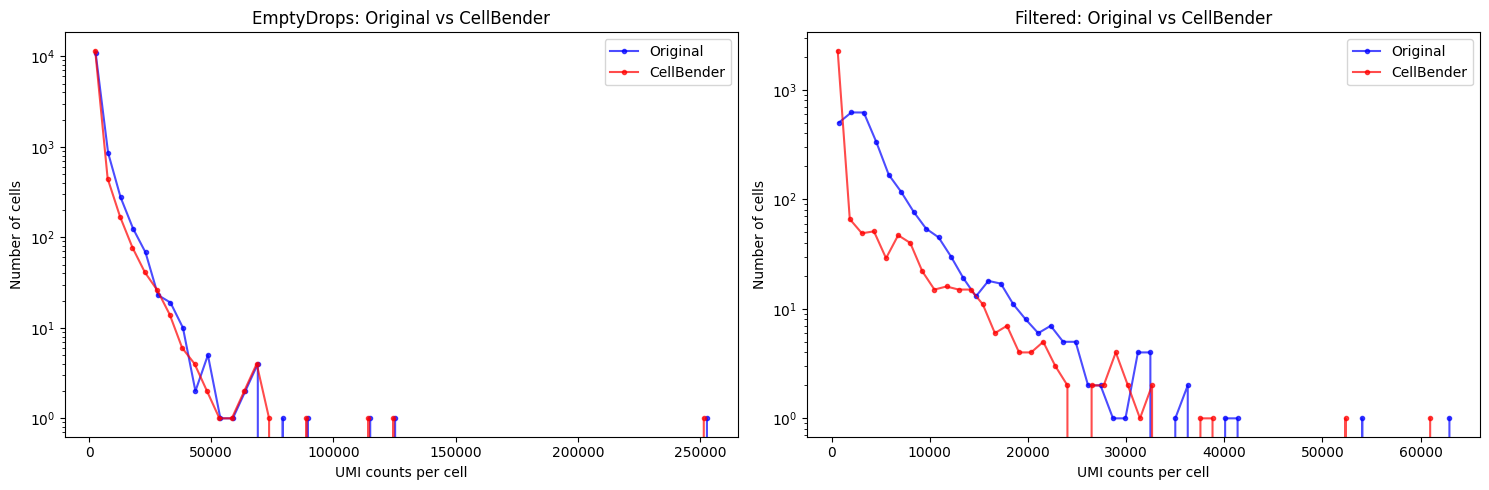

In [2]:
print("=== data comparison overview ===")
print(f"EmptyDrops data (edata): {edata.shape[0]} cells × {edata.shape[1]} genes")
print(f"EmptyDrops + CellBender (ecdata): {ecdata.shape[0]} cells × {ecdata.shape[1]} genes")
print(f"Filtered data (fdata): {fdata.shape[0]} cells × {fdata.shape[1]} genes") 
print(f"Filtered + CellBender (fcdata): {fcdata.shape[0]} cells × {fcdata.shape[1]} genes")
print("-> there where no cells filtered out by CellBender at all")

# Make variable names unique to avoid warnings
ecdata.var_names_make_unique()
fcdata.var_names_make_unique()
fdata.var_names_make_unique()

# calc UMI counts
edata_umi = np.array(edata.X.sum(axis=1)).flatten()
ecdata_umi = np.array(ecdata.X.sum(axis=1)).flatten()
fdata_umi = np.array(fdata.X.sum(axis=1)).flatten()
fcdata_umi = np.array(fcdata.X.sum(axis=1)).flatten()

print(f"\n=== UMI Count Statistics ===")
print(f"EmptyDrops - Mean UMI: {edata_umi.mean():.1f}")
print(f"EmptyDrops+CB - Mean UMI: {ecdata_umi.mean():.1f}")
print(f"Filtered - Mean UMI: {fdata_umi.mean():.1f}")
print(f"Filtered+CB - Mean UMI: {fcdata_umi.mean():.1f}")

# Calculate UMI reduction
edata_total = edata_umi.sum()
ecdata_total = ecdata_umi.sum()
fdata_total = fdata_umi.sum()
fcdata_total = fcdata_umi.sum()

print(f"\n=== Total UMI Reduction by CellBender ===")
print(f"EmptyDrops: {edata_total:,.0f} → {ecdata_total:,.0f} UMIs ({(1-ecdata_total/edata_total)*100:.1f}% reduction)")
print(f"Filtered: {fdata_total:,.0f} → {fcdata_total:,.0f} UMIs ({(1-fcdata_total/fdata_total)*100:.1f}% reduction)")


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# PLOTs
hist_e_orig, bins_e_orig = np.histogram(edata_umi, bins=50)
hist_e_cb, bins_e_cb = np.histogram(ecdata_umi, bins=50)
bin_centers_e_orig = (bins_e_orig[:-1] + bins_e_orig[1:]) / 2
bin_centers_e_cb = (bins_e_cb[:-1] + bins_e_cb[1:]) / 2

axes[0].plot(bin_centers_e_orig, hist_e_orig, 'o-', alpha=0.7, label='Original', color='blue', markersize=3)
axes[0].plot(bin_centers_e_cb, hist_e_cb, 'o-', alpha=0.7, label='CellBender', color='red', markersize=3)
axes[0].set_xlabel('UMI counts per cell')
axes[0].set_ylabel('Number of cells')
axes[0].set_title('EmptyDrops: Original vs CellBender')
axes[0].legend()
axes[0].set_yscale('log')

hist_f_orig, bins_f_orig = np.histogram(fdata_umi, bins=50)
hist_f_cb, bins_f_cb = np.histogram(fcdata_umi, bins=50)
bin_centers_f_orig = (bins_f_orig[:-1] + bins_f_orig[1:]) / 2
bin_centers_f_cb = (bins_f_cb[:-1] + bins_f_cb[1:]) / 2

axes[1].plot(bin_centers_f_orig, hist_f_orig, 'o-', alpha=0.7, label='Original', color='blue', markersize=3)
axes[1].plot(bin_centers_f_cb, hist_f_cb, 'o-', alpha=0.7, label='CellBender', color='red', markersize=3)
axes[1].set_xlabel('UMI counts per cell')
axes[1].set_ylabel('Number of cells')
axes[1].set_title('Filtered: Original vs CellBender')
axes[1].legend()
axes[1].set_yscale('log')

plt.tight_layout()
plt.show()


In [3]:
# Analyze which genes were most affected by CellBender filtering
print("=== Gene-level Analysis: Most Affected Genes ===")

# Calculate total UMI counts per gene for each dataset
edata_gene_totals = edata.X.sum(axis=0).A1 if hasattr(edata.X, 'A1') else edata.X.sum(axis=0)
ecdata_gene_totals = ecdata.X.sum(axis=0).A1 if hasattr(ecdata.X, 'A1') else ecdata.X.sum(axis=0)
fdata_gene_totals = fdata.X.sum(axis=0).A1 if hasattr(fdata.X, 'A1') else fdata.X.sum(axis=0)
fcdata_gene_totals = fcdata.X.sum(axis=0).A1 if hasattr(fcdata.X, 'A1') else fcdata.X.sum(axis=0)

print(f"ED row counts: {edata_gene_totals}")
print(f"ED+CB row counts: {ecdata_gene_totals}")
print(f"F row counts: {fdata_gene_totals}")
print(f"F+CB row counts: {fcdata_gene_totals}")

# Create analysis for EmptyDrops data
e_gene_reduction = edata_gene_totals - ecdata_gene_totals
e_gene_reduction_pct = (e_gene_reduction / edata_gene_totals) * 100
f_gene_reduction = fdata_gene_totals - fcdata_gene_totals
f_gene_reduction_pct = (f_gene_reduction / fdata_gene_totals) * 100

# replace nan with 0 (occured in division with 100 in xxx_pct)
e_gene_reduction_pct = np.where(np.isnan(e_gene_reduction_pct), 0, e_gene_reduction_pct)
f_gene_reduction_pct = np.where(np.isnan(f_gene_reduction_pct), 0, f_gene_reduction_pct)

print(f"ED reduction: {e_gene_reduction}")
print(f"ED+CB reduction: {e_gene_reduction_pct}")
print(f"F reduction: {f_gene_reduction}")
print(f"F+CB reduction: {f_gene_reduction_pct}")

# min and max of these numpy.matrices
print(f"max of ED reduction: {e_gene_reduction.max()} --- min {e_gene_reduction.min()}")
print(f"max of ED+CB reduction: {e_gene_reduction_pct.max()} --- min {e_gene_reduction_pct.min()}")
print(f"max of F reduction: {f_gene_reduction.max()} --- min {f_gene_reduction.min()}")
print(f"max of F+CB reduction: {f_gene_reduction_pct.max()} --- min {f_gene_reduction_pct.min()}")

=== Gene-level Analysis: Most Affected Genes ===
ED row counts: [[ 1242.   865.   879. ...   395. 36345.     0.]]
ED+CB row counts: [[  749.   289.   659. ...   111. 13431.     0.]]
F row counts: [[ 267.  281.  412. ...   85. 6337.    0.]]
F+CB row counts: [[ 182.   99.  302. ...   25. 2011.    0.]]
ED reduction: [[  493.   576.   220. ...   284. 22914.     0.]]
ED+CB reduction: [[39.69404187 66.58959538 25.02844141 ... 71.89873418 63.04581098
   0.        ]]
F reduction: [[  85.  182.  110. ...   60. 4326.    0.]]
F+CB reduction: [[31.83520734 64.76868391 26.6990304  ... 70.58823705 68.26574206
   0.        ]]
max of ED reduction: 333604.0 --- min 0.0
max of ED+CB reduction: 100.0 --- min 0.0
max of F reduction: 82430.0 --- min 0.0
max of F+CB reduction: 100.0 --- min 0.0


/var/folders/06/zfzddxwn4hd0ywccb30sl4qw0000gn/T/ipykernel_36932/1977684459.py:17: RuntimeWarning: invalid value encountered in divide
  e_gene_reduction_pct = (e_gene_reduction / edata_gene_totals) * 100
/var/folders/06/zfzddxwn4hd0ywccb30sl4qw0000gn/T/ipykernel_36932/1977684459.py:19: RuntimeWarning: invalid value encountered in divide
  f_gene_reduction_pct = (f_gene_reduction / fdata_gene_totals) * 100


In [4]:
# EmptyDrops gene analysis

#  flatten arrays to ensure 1D
# sorted after absolute UMI counts removed, since percent doesnt say this much when only 2 UMIs where removed but it is still 100% reduction
e_gene_df = pd.DataFrame({
    'gene': edata.var_names,
    'original_umi': np.array(edata_gene_totals).flatten(),
    'cellbender_umi': np.array(ecdata_gene_totals).flatten(),
    'umi_removed': np.array(e_gene_reduction).flatten(),
    'percent_removed': np.array(e_gene_reduction_pct).flatten()
})
e_gene_df = e_gene_df.sort_values('umi_removed', ascending=False)
e_gene_df.head(10)

# save the panda to data /cellbender_results/ folder
e_gene_df.to_csv('cellbender_results/emptydrops_genes_reduction.csv', index=False)


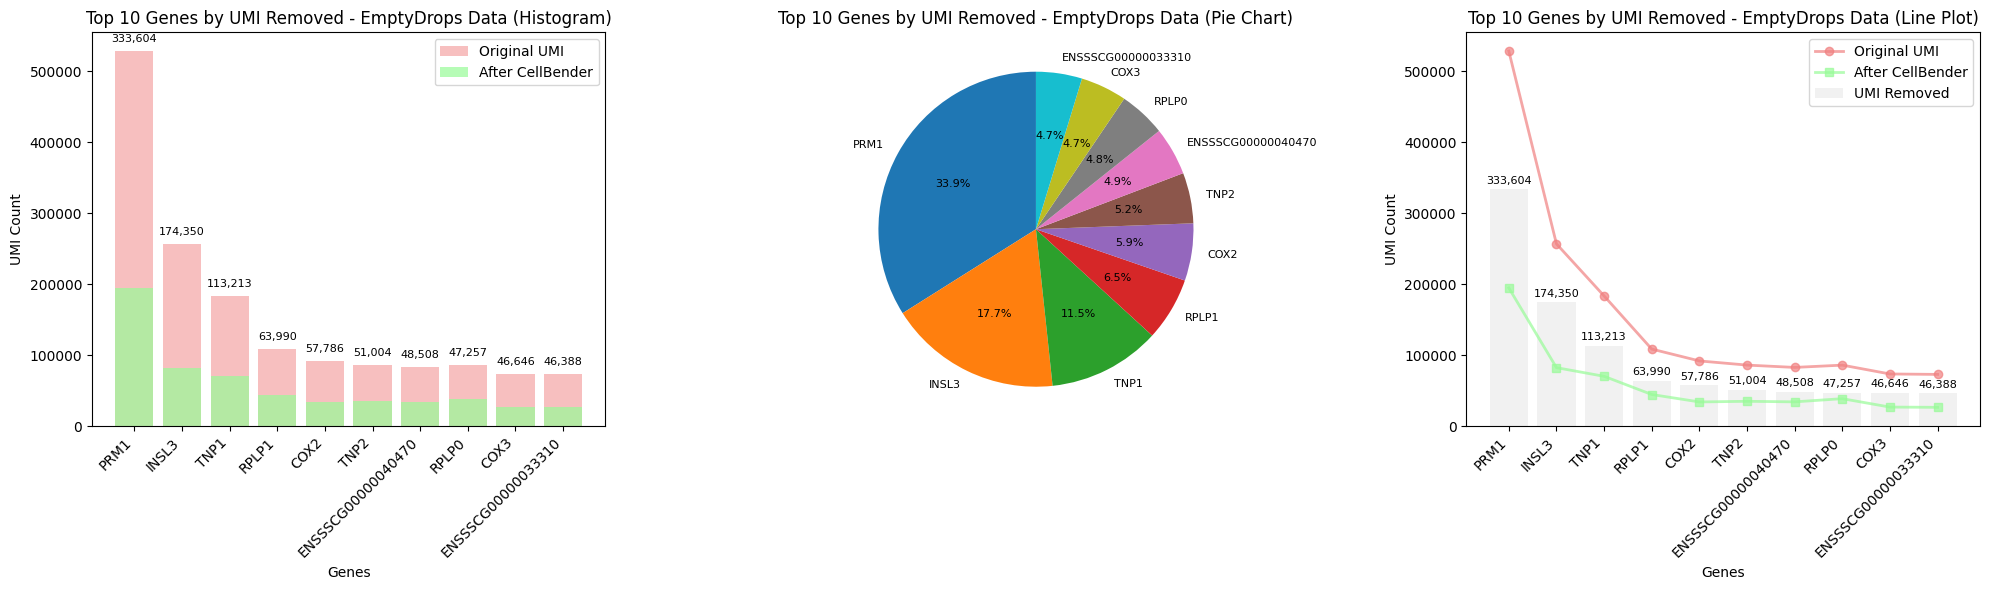

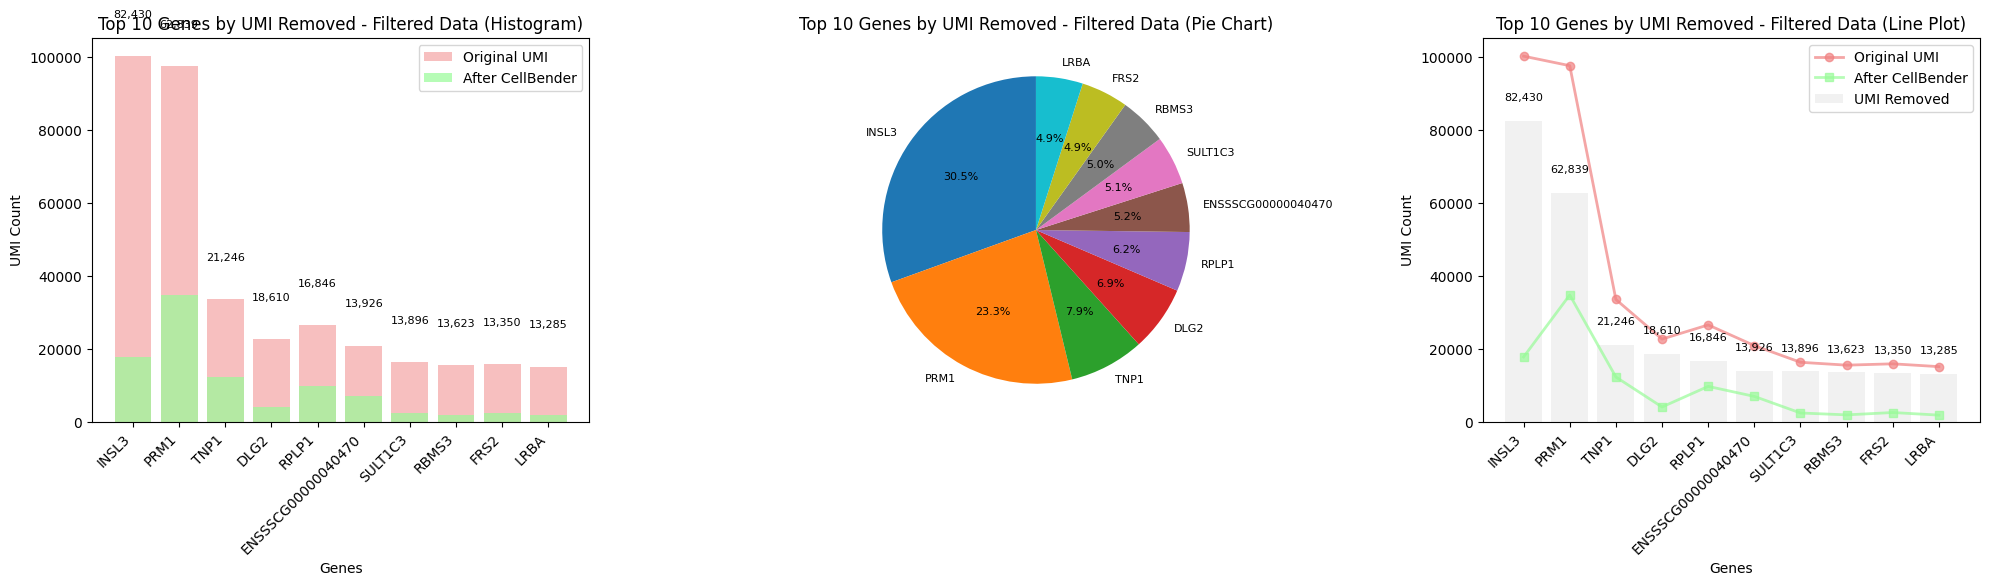

In [7]:
# HISTOGRAM, PIE CHART, AND LINE PLOT - EMPTYDROPS DATA

# Get top 10 genes by UMI removed
top_10_genes = e_gene_df.head(10)

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Histogram - background bars showing original UMI counts
ax1.bar(range(len(top_10_genes)), top_10_genes['original_umi'], color='lightcoral', alpha=0.5, label='Original UMI')
# Foreground bars showing remaining UMI after CellBender
ax1.bar(range(len(top_10_genes)), top_10_genes['cellbender_umi'], color='palegreen', alpha=0.7, label='After CellBender')
ax1.set_xlabel('Genes')
ax1.set_ylabel('UMI Count')
ax1.set_title('Top 10 Genes by UMI Removed - EmptyDrops Data (Histogram)')
ax1.set_xticks(range(len(top_10_genes)))
ax1.set_xticklabels(top_10_genes['gene'], rotation=45, ha='right')
ax1.legend()

# Add value labels on bars showing UMI removed count
for i, (original, removed) in enumerate(zip(top_10_genes['original_umi'], top_10_genes['umi_removed'])):
    ax1.text(i, original + 10000, f'{int(removed):,}', ha='center', va='bottom', fontsize=8)

# Pie chart
ax2.pie(top_10_genes['umi_removed'], labels=top_10_genes['gene'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
ax2.set_title('Top 10 Genes by UMI Removed - EmptyDrops Data (Pie Chart)')

# Line plot - same principle as histogram but as lines
ax3.plot(range(len(top_10_genes)), top_10_genes['original_umi'], marker='o', color='lightcoral', alpha=0.7, linewidth=2, label='Original UMI')
ax3.plot(range(len(top_10_genes)), top_10_genes['cellbender_umi'], marker='s', color='palegreen', alpha=0.7, linewidth=2, label='After CellBender')

# Add bars showing the UMI removed count
bars = ax3.bar(range(len(top_10_genes)), top_10_genes['umi_removed'], alpha=0.3, color='lightgrey', label='UMI Removed')

ax3.set_xlabel('Genes')
ax3.set_ylabel('UMI Count')
ax3.set_title('Top 10 Genes by UMI Removed - EmptyDrops Data (Line Plot)')
ax3.set_xticks([bar.get_x() + bar.get_width()/2 for bar in bars])
ax3.set_xticklabels(top_10_genes['gene'], rotation=45, ha='right')
ax3.legend()
# Add value labels on bars showing UMI removed count
for i, removed in enumerate(top_10_genes['umi_removed']):
    ax3.text(i, removed + 5000, f'{int(removed):,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# HISTOGRAM, PIE CHART, AND LINE PLOT - FILTERED DATA

# Get top 10 genes by UMI removed for filtered data
f_top_10_genes = f_gene_df.head(10)

# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Histogram - background bars showing original UMI counts
ax1.bar(range(len(f_top_10_genes)), f_top_10_genes['original_umi'], color='lightcoral', alpha=0.5, label='Original UMI')
# Foreground bars showing remaining UMI after CellBender
ax1.bar(range(len(f_top_10_genes)), f_top_10_genes['cellbender_umi'], color='palegreen', alpha=0.7, label='After CellBender')
ax1.set_xlabel('Genes')
ax1.set_ylabel('UMI Count')
ax1.set_title('Top 10 Genes by UMI Removed - Filtered Data (Histogram)')
ax1.set_xticks(range(len(f_top_10_genes)))
ax1.set_xticklabels(f_top_10_genes['gene'], rotation=45, ha='right')
ax1.legend()

# Add value labels on bars showing UMI removed count
for i, (original, removed) in enumerate(zip(f_top_10_genes['original_umi'], f_top_10_genes['umi_removed'])):
    ax1.text(i, original + 10000, f'{int(removed):,}', ha='center', va='bottom', fontsize=8)

# Pie chart
ax2.pie(f_top_10_genes['umi_removed'], labels=f_top_10_genes['gene'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
ax2.set_title('Top 10 Genes by UMI Removed - Filtered Data (Pie Chart)')

# Line plot - same principle as histogram but as lines
ax3.plot(range(len(f_top_10_genes)), f_top_10_genes['original_umi'], marker='o', color='lightcoral', alpha=0.7, linewidth=2, label='Original UMI')
ax3.plot(range(len(f_top_10_genes)), f_top_10_genes['cellbender_umi'], marker='s', color='palegreen', alpha=0.7, linewidth=2, label='After CellBender')

# Add bars showing the UMI removed count
bars = ax3.bar(range(len(f_top_10_genes)), f_top_10_genes['umi_removed'], alpha=0.3, color='lightgrey', label='UMI Removed')

ax3.set_xlabel('Genes')
ax3.set_ylabel('UMI Count')
ax3.set_title('Top 10 Genes by UMI Removed - Filtered Data (Line Plot)')
ax3.set_xticks([bar.get_x() + bar.get_width()/2 for bar in bars])
ax3.set_xticklabels(f_top_10_genes['gene'], rotation=45, ha='right')
ax3.legend()
# Add value labels on bars showing UMI removed count
for i, removed in enumerate(f_top_10_genes['umi_removed']):
    ax3.text(i, removed + 5000, f'{int(removed):,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


In [6]:
# Filtered gene analysis
f_gene_df = pd.DataFrame({
    'gene': fdata.var_names,
    'original_umi': np.array(fdata_gene_totals).flatten(),
    'cellbender_umi': np.array(fcdata_gene_totals).flatten(),
    'umi_removed': np.array(f_gene_reduction).flatten(),
    'percent_removed': np.array(f_gene_reduction_pct).flatten()
})
f_gene_df = f_gene_df.sort_values('umi_removed', ascending=False)
f_gene_df

,gene,original_umi,cellbender_umi,umi_removed,percent_removed
6201,INSL3,100306.0,17876.0,82430.0,82.178533
11939,PRM1,97700.0,34861.0,62839.0,64.318323
8825,TNP1,33625.0,12379.0,21246.0,63.185132
10715,DLG2,22777.0,4167.0,18610.0,81.705230
169,RPLP1,26656.0,9810.0,16846.0,63.197780
...,...,...,...,...,...
8619,PRLHR,0.0,0.0,0.0,0.000000
8585,ENSSSCG00000063243,0.0,0.0,0.0,0.000000
8584,ENSSSCG00000049810,0.0,0.0,0.0,0.000000
8576,EMX2,0.0,0.0,0.0,0.000000
